In [58]:
import pandas as pd
from pandas import DataFrame
from pandas import read_csv, pivot_table
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [59]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')
print(train.shape, test.shape, submission.shape)

(891, 12) (418, 11) (418, 2)


In [60]:
# 데이터 확인
print(train.head(3))
print(test.head(3))
print(submission.head(3))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
   PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   

   Parch 

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [62]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [63]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

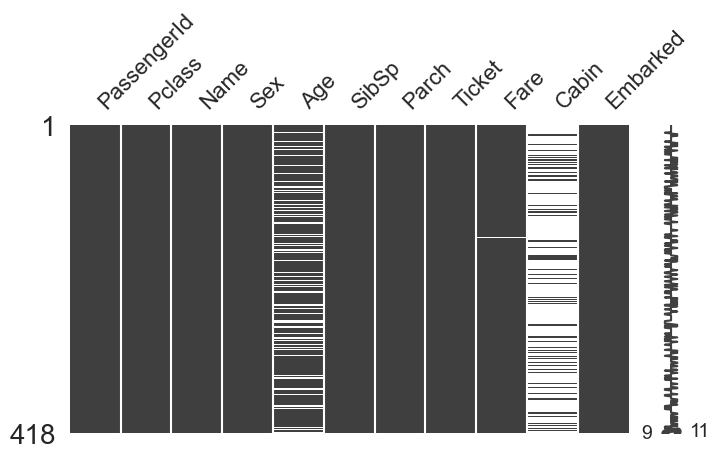

     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0              1         0       3  22.0      1      0   7.2500
1              2         1       1  38.0      1      0  71.2833
2              3         1       3  26.0      0      0   7.9250
3              4         1       1  35.0      1      0  53.1000
4              5         0       3  35.0      0      0   8.0500
..           ...       ...     ...   ...    ...    ...      ...
886          887         0       2  27.0      0      0  13.0000
887          888         1       1  19.0      0      0  30.0000
888          889         0       3   NaN      1      2  23.4500
889          890         1       1  26.0      0      0  30.0000
890          891         0       3  32.0      0      0   7.7500

[891 rows x 7 columns]


In [64]:
import missingno as msno
msno.matrix(test, figsize=(8,4))
plt.show()
train1 = train.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
print(train1)

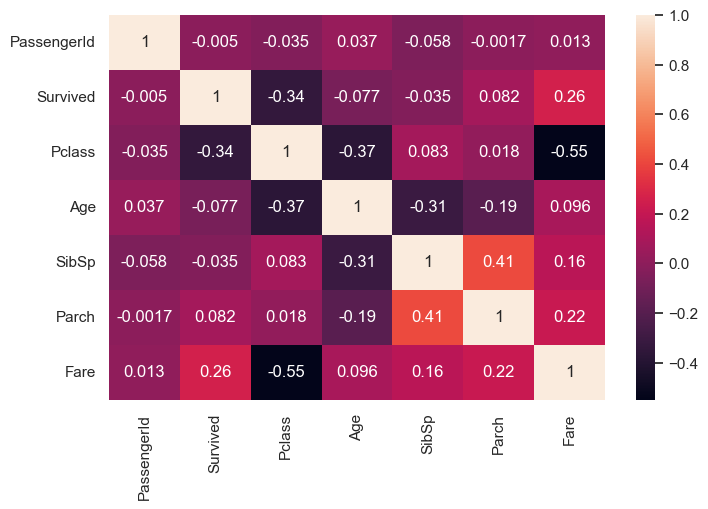

In [65]:
# 숫자형 변수 간의 상관 관계를 계산하여 히트맵 그리기
plt.figure(figsize=(8,5))
sns.set(font_scale=1.0)
sns.heatmap(train1.corr(), annot=True, cbar=True)
plt.show()

In [66]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [67]:
train1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [68]:
train1 = train1.fillna(29)
train1

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,29.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


방법 1

In [69]:
names = train1.columns
n = len(names)
pv = 0.05

data = []

for i in range(0, n):
    fields = names[1] + 'vs' + names[i]
    s, p = stats.pearsonr(train1[names[1]], train1[names[i]])
    result = p < pv

    data.append({'fields': fields, 'statistic':s, 'pvalue': p, 'result': result})

rdf = DataFrame(data)
rdf.set_index('fields', inplace=True)
rdf


,statistic,pvalue,result
fields,,,
SurvivedvsPassengerId,-0.005007,8.813658e-01,False
SurvivedvsSurvived,1.000000,0.000000e+00,True
SurvivedvsPclass,-0.338481,2.537047e-25,True
SurvivedvsAge,-0.067814,4.300040e-02,True
SurvivedvsSibSp,-0.035322,2.922439e-01,False
SurvivedvsParch,0.081629,1.479925e-02,True
SurvivedvsFare,0.257307,6.120189e-15,True


In [70]:
x = train1.loc[:, ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].values
x

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 3.    , 29.    ,  1.    ,  2.    , 23.45  ],
       [ 1.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 3.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

In [71]:
import statsmodels.api as sm
results = sm.OLS(train1['Survived'], sm.add_constant(x)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     34.86
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           1.35e-32
Time:                        15:02:27   Log-Likelihood:                -541.87
No. Observations:                 891   AIC:                             1096.
Df Residuals:                     885   BIC:                             1124.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0679      0.081     13.197      0.000       0.909       1.227
x1            -0.2073      0.023     -9.006      0.000      -0.252      -0.162
x2            -0.0076      0.001     -6.067      0.000      -0.010      -0.005
x3            -0.0429      0.015     -2.803      0.005      -0.073      -0.013
x4             0.0454      0.021      2.178      0.030       0.004       0.086
x5             0.0008      0.000      2.066      0.039    3.91e-05       0.002
==============================================================================
Omnibus:                      339.264   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.204
Skew:                           0.433   Prob(JB):                     2.09e-16
Kurtosis:                       1.907   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 회귀식은 Survived = (-0.207 * Pclass)-(0.007 *Age)-(-0.042 * SibSp) + (0.045 * Parch) + (0.0008 * Fare) + 1.06다.
- F-statistic의 p-value는 1.35e-32로 0.05보다 작기에 이 회귀식은 회귀분석 모델 전체에 대해 통계적으로 의미가 있다.
- 중간쯤에 보면 coef와 여러 변수들의 p-value 값이 나와있습니다.
- 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',는 0.05미만이므로 유의미하다고 볼 수 있다.
- coef가 양수면 양의 상관관계를 보이고 -면 음의 상관관계를 보인다.
- 마지막으로 모델 적합성 = 설명력(Adj. R-squared:)은 0.16정도로 16퍼센트만큼의 설명력을 지니고 있기에 굉장히 낮은 수치를 보이고 있다.
- 60넘어가는 수치면 사실 쓸만한 것/ 값이 되게 높을수록 -> 과대적합
- 지나치게 낮은 경우 -> 과소적합

In [72]:
# 위의 corr() histmap 그림과 아래 유의미한 수치들을 확인하여 보면 
# Survived에 대한 유의미한 자료는 pclass와 fare로 추정된다.
x = train1.loc[:, ['Pclass', 'Fare']].values
x

array([[ 3.    ,  7.25  ],
       [ 1.    , 71.2833],
       [ 3.    ,  7.925 ],
       ...,
       [ 3.    , 23.45  ],
       [ 1.    , 30.    ],
       [ 3.    ,  7.75  ]])

In [73]:
import statsmodels.api as sm
results = sm.OLS(train1['Survived'], sm.add_constant(x)).fit()
# add_constanst 상수항 결합(가중치 값 추정)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     61.61
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           8.78e-26
Time:                        15:02:27   Log-Likelihood:                -564.07
No. Observations:                 891   AIC:                             1134.
Df Residuals:                     888   BIC:                             1149.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7310      0.060     12.197      0.000       0.613       0.849
x1            -0.1643      0.022     -7.501      0.000      -0.207      -0.121
x2             0.0010      0.000      2.714      0.007       0.000       0.002
==============================================================================
Omnibus:                     1030.575   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.979
Skew:                           0.456   Prob(JB):                     4.77e-20
Kurtosis:                       1.750   Cond. No.                         246.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     61.61
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           8.78e-26
Time:                        15:02:27   Log-Likelihood:                -564.07
No. Observations:                 891   AIC:                             1134.
Df Residuals:                     888   BIC:                             1149.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7310      0.060     12.197      0.0

### skikt-learn 패키지를 사용한 선형 회귀분석
###### sciket-learn 패키지를 사용하여 선형 회귀분석을 하는 경우에는 linear_model 서브 패키지의 LinearRegression 클래스를 사용한다.

In [75]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

fit_intercept 인수는 모형에 상수항이 있는가 없는가를 결정하는 인수, 디폴트 값이 True.
만약 상수항이 없으면 fit_intercept=False로 설정한다.


coef_ : 추정된 가중치 백터
intercept_ : 추정된 상수항

In [76]:
model = model.fit(x,train1['Survived'])

In [77]:
y_new = model.predict(x)

In [78]:
# LinsearRegression 으로 선형회귀
model = LinearRegression().fit(x, train1['Survived'])
print(model.intercept_, model.coef_)

0.7309906771742805 [-0.16432464  0.00100032]


In [79]:
# predcit 매서드를 사용하면 새로운 X값에 대응하는 y값을 예측할 수 있다.
# 단 x값은 2차원 배열을 써야 한다

statsmodels 패키지에서는 OLS 클래스를 사용하여 선형 회귀분석을 실시한다. OLS 클래스 사용법은 다음과 같다.

- 독립변수와 종속변수가 모두 포함된 데이터프레임 생성. 상수항 결함은 하지 않아도 된다.
- OLS 클래스 객체 생성. 이 때 from_formula 메서드의 인수로 종속변수와 독립변수를 지정하는 formula 문자열을 넣는다. data 인수로는 독립변수와 종속변수가 모두 포함된 데이터프레임을 넣는다.

In [89]:
from statsmodels.formula.api import ols
ols('Pclass ~ Survived', data=train1).fit().summary()
# ols = Ordinary leasy squares
# Df model : 독립변수의 개수
# Df residuals : 전체 표본개수에서 독립변수, 종속변수의 개수를 뺀 것
# intercept coef : 절편, 독립변수 coef: 기울기

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Pclass   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     115.0
Date:                Mon, 24 Jul 2023   Prob (F-statistic):           2.54e-25
Time:                        15:09:22   Log-Likelihood:                -1050.0
No. Observations:                 891   AIC:                             2104.
Df Residuals:                     889   BIC:                             2114.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5319      0.034     75.364      0.000       2.466       2.598
Survived      -0.5816      0.054    -10.725      0.000      -0.688      -0.475
==============================================================================
Omnibus:                      146.941   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.600
Skew:                          -0.561   Prob(JB):                     3.83e-17
Kurtosis:                       2.119   Cond. No.                         2.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

위 회귀분석 결과에서 나오는 주요 결과물들의 설명을 아래와 같이 정리해 보았다.

 

   - Dep. Variable: Dependent variable, 즉 종속변수를 의미한다.

   - Model: 모델링 방법을 뜻하고, OLS는  Ordinary Least Squares의 약자이다.

      ** 참고로 OLS란, 최소제곱법, 또는 최소자승법, 최소제곱근사법, 최소자승근사법(method of least squares, least squares approximation)이라고도 하며, 어떤 계의 해방정식을 근사적으로 구하는 방법으로서 근사적으로 구하려는 해와 실제 해의 오차의 제곱의 합이 최소가 되는 해를 구하는 방법이다. [출처: 위키백과]

   - No. Observations: Number of observations, 관찰표본 수, 즉 총 표본 수를 뜻한다. 

   - Df Residuals: DF는 Degree of Freedom으로 자유도를 뜻하는데, DF Residuals는 전체 표본 수에서 측정되는 변수들(종속변수 및 독립변수)의 개수를 빼서 구한다. 이번 회귀분석에서 DF Residuals를 구하자면,  전체 표본 수 50개 - 종속변수1개 - 독립변수1개 = 48로 구할 수 있다.

   - Df Model: 독립변수의 개수이다.

   - R squared: R의 제곱이라는 뜻이고 결정계수를 의미한다. 전체 데이터 중 해당 회귀모델이 설명할 수 있는 데이터의 비율, 회귀식의 설명력을 나타낸다. SSTr/SST이나 상관계수 R을 제곱해서 구할 수 있다.

   - F-statistics: F통계량을 뜻한다. F통계량은 MSR/MSE로 구할 수 있다. (상세 내용은 본 포스팅 #5. 에서 추가설명 한다)

   - Prob: F통계량에 해당하는 P-value를 의미한다. P는 Probability의 첫글자이다.

  [회귀계수]: 다음 두 값은 해당 모델의 회귀계수들이다.

   - Intercept coef: Intercept coefficient는 회귀식의 절편 값을 의미한다.

   - Survived coef: 독립변수 coefficient는 독립변수 "Survived"의 회귀계수를 의미하며, 회귀식에서 기울기를 의미한다. 

     --> 위의 회귀계수들을 활용해 다음과 같이 회귀식을 수기로 작성할 수 있다.

     --> y = -0.5816X +2.5319